In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import csv

def clean(paths, mode=True):
    '''
    Columns
    0 useless
    1 INIT v FTP
    2 L v R
    3 wrong vs correct
    4 messy vs clean
    5 trial start
    6 stim start
    7 turn frame
    8 trial end
    '''
    trial_data = []
    for path in paths:
        with open(path) as csvfile:
            reader = csv.reader(csvfile, delimiter = ",")
            for row in reader:
                if row[4]=="clean" and (mode or row[1]=="INIT"):
                    trial_data.append(int(row[7])-int(row[6]))
                    #print(int(row[7])-int(row[6]))
    return np.array(trial_data)

In [28]:
#paths0 = []
paths1 = ["/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s1/05_05_2022___16_12_21/trial_parameters_05_05_2022___16_12_21.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s1/05_06_2022___10_48_46/trial_parameters_05_06_2022___10_48_46.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s1/05_09_2022___17_22_31/trial_parameters_05_09_2022___17_22_31.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s1/05_10_2022___13_54_13/trial_parameters_05_10_2022___13_54_13.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s1/05_11_2022___12_24_04/trial_parameters_05_11_2022___12_24_04.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s1/05_12_2022___13_28_46/trial_parameters_05_12_2022___13_28_46.csv"]
paths2 = ["/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s2/05_17_2022___16_15_20/trial_parameters_05_17_2022___16_15_20.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s2/05_18_2022___13_28_32/trial_parameters_05_18_2022___13_28_32.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s2/05_20_2022___15_00_32/trial_parameters_05_20_2022___15_00_32.csv",
          "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m12lr/s2/05_23_2022___13_56_29/trial_parameters_05_23_2022___13_56_29.csv",]

In [29]:
total_data = np.concatenate((clean(paths1), clean(paths2, mode=False)))

np.histogram(total_data)

(array([761,  89,  32,  15,   4,   4,   5,   2,   0,   2]),
 array([ 13. ,  36.5,  60. ,  83.5, 107. , 130.5, 154. , 177.5, 201. ,
        224.5, 248. ]))

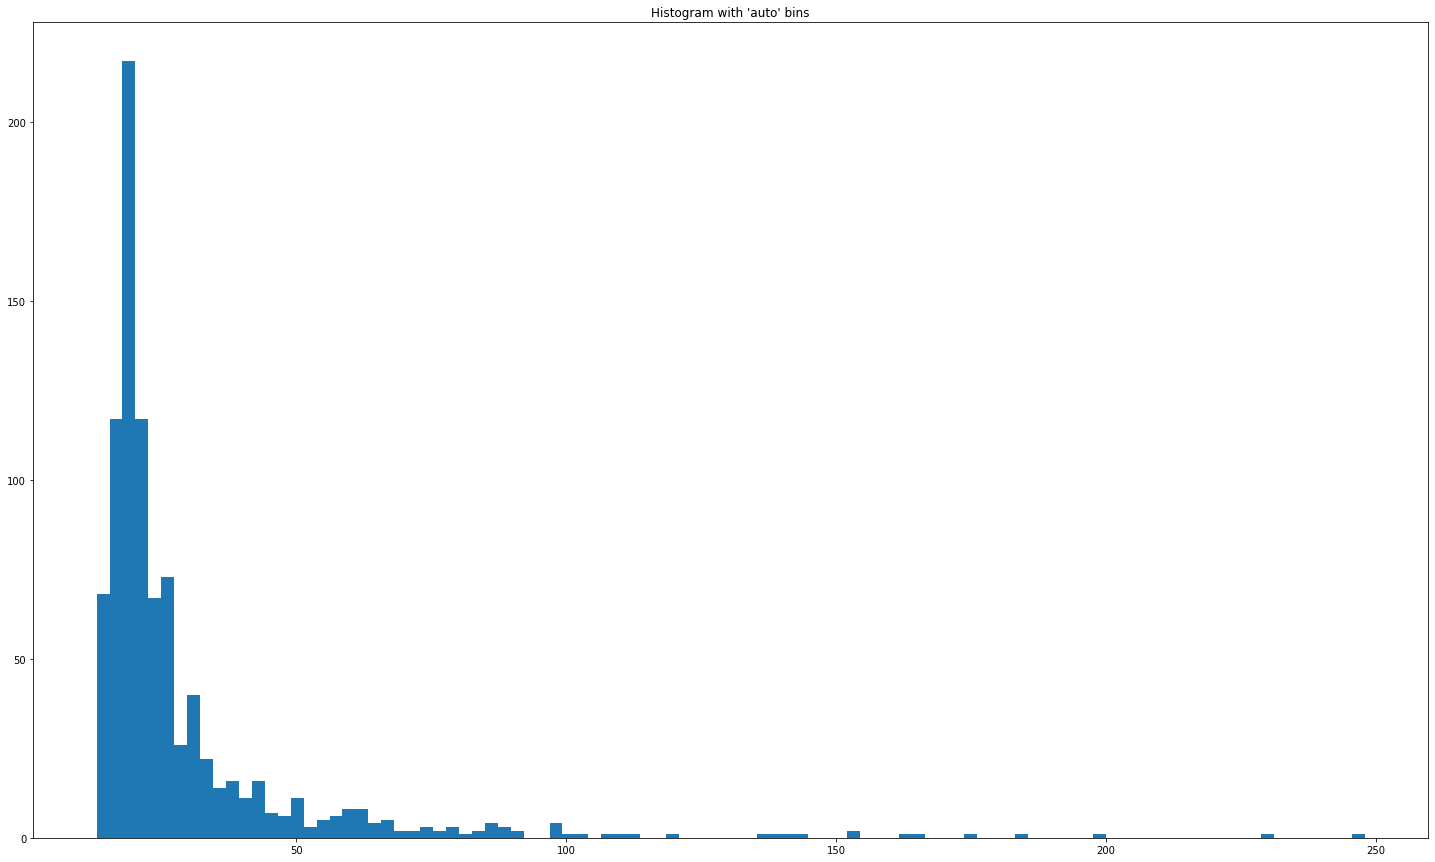

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
_ = plt.hist(total_data, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()